In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Activation function

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_d(z):
    return sigmoid(z) * (1 - sigmoid(z))

### Cost funtion

In [4]:
def cost(activation, target):
    return 0.5 * (target - activation) ** 2

def cost_d(activation, target):
    return (target - activation)

### Simple ANN with 1 hidden layer

Here we manually do backpropagation to learn weights for a simple nn with 30 hidden weights that will attempt to classify between 0 and 1 in the mnist dataset

In [115]:
input_dim = 28 * 28
hidden_dim = 30 
out_dim = 10

hidden_weights = np.random.normal(0, 1, (input_dim, hidden_dim))
out_weights = np.random.normal(0, 1, (hidden_dim, out_dim))

hidden_biases = np.zeros((1, hidden_dim))
out_biases = np.zeros((1, out_dim))

In [24]:
def forward(x):
    """Compute a full forward pass of this small network"""
    hidden_activations = sigmoid(np.dot(x, hidden_weights) + hidden_biases)
    print('hidden a', hidden_activations.shape)
    out_activations = sigmoid(np.dot(hidden_activations, out_weights) + out_biases)
    print('out_a', out_activations.shape)
    return out_activations

In [72]:
def backpropagate(x, y):
    # Do a forward pass but cache the activations and z's 
    hidden_z = np.dot(x, hidden_weights) + hidden_biases
    hidden_a = sigmoid(hidden_z)
    out_z = np.dot(hidden_a, out_weights) + out_biases
    out_a = sigmoid(out_z)
    correct = np.count_nonzero(np.argmax(out_a, 1) == np.argmax(y, 1))
    # Now do the backwards pass
    # Output layer
    out_error = cost_d(out_a, y) * sigmoid_d(out_z)
    
    # Partial derivatives
    change_out_biases = np.sum(out_error, 0)
    change_out_weights = np.dot(hidden_a.T, out_error)
    # Hidden layer
    # Backpropagate the error
    hidden_error = np.dot(out_weights, out_error.T).T * sigmoid_d(hidden_z)
    # Get the partial derivatives
    change_hidden_biases = np.sum(hidden_error, 0)
    change_hidden_weights = np.dot(x.T, hidden_error)

    return  correct, change_out_weights, change_out_biases, change_hidden_weights, change_hidden_biases

### Get the MNIST dataset
And just grab the 0 and 1 images

In [8]:
from data_loaders import MNISTLoader
mloader = MNISTLoader()
train_data, train_labels = mloader.get_training_set()

In [27]:
num_samples = train_labels.shape[0]

# get images as vectors
x = train_data.reshape(num_samples, -1)/255
print(x[0].max())

# one-hot encode labels
y = np.zeros((num_samples, 10))
y[np.arange(num_samples),train_labels] = 1

1.0


### Stochastic gradient descent

Use SGD to train this small network for a few epochs and watch our training accuracy

In [120]:
learning_rate = 1e-2
batch_size = 5 
batch_starts = np.arange(batch_size, num_samples, batch_size)
idxes = np.arange(0, num_samples, 1)
num_epochs = 1
for epoch in range(num_epochs):
    np.random.shuffle(idxes)
    batches = np.split(idxes, batch_starts)
    total_correct = 0
    for batch in batches:
        correct, d_ow, d_ob, d_hw, d_hb = backpropagate(x[batch], y[batch])
    
        total_correct += correct
        out_weights += learning_rate * (1/batch_size) * d_ow 
        out_biases += learning_rate * (1/batch_size) * d_ob
        hidden_weights += learning_rate * (1/batch_size) * d_hw 
        hidden_biases += learning_rate * (1/batch_size) * d_hb

    print(f'{total_correct} / {num_samples}')

52650 / 60000


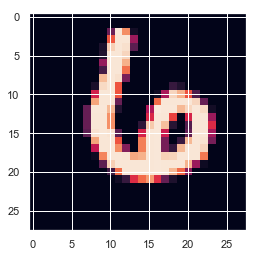

In [95]:
plt.imshow(x[50280].reshape(28, 28))

In [92]:
50000/60000

0.8333333333333334